# Google Stock Price Data (2020-2025) | GOOGL

Kaggle Dataset Link: https://www.kaggle.com/datasets/mzohaibzeeshan/google-stock-price-data-2020-2025-googl/data

### Data Exploration



In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/googl_data_2020_2025.csv')

In [3]:
data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [6]:
data.shape

(1260, 7)

In [4]:
data.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,Ticker,105.5872421,105.9700012,142.0800018,70.13400269,138.5,22288000
freq,1,3,3,3,2,3,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [7]:
# check null values
data.isnull().sum()

,0
Price,0
Adj Close,1
Close,1
High,1
Low,1
Open,1
Volume,1


### Data Preprocessing

In [8]:
#remove first two rows
data = data.iloc[2:].reset_index(drop=True)
data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [9]:
# change the column name
data.rename(columns={"Price": "Date"}, inplace=True)
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [10]:
# Convert the 'Date' column to YYYY-MM-DD format
data["Date"] = pd.to_datetime(data["Date"]).dt.strftime('%Y-%m-%d')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [11]:
# Remove extra spaces from column names
data.columns = data.columns.str.strip()

# Identify numeric columns
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

# Convert columns to float
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

print(data.dtypes)

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object


In [12]:
# Compute daily price change (%)
data["Price Change (%)"] = data["Close"].pct_change() * 100
data.dropna(inplace=True)

### Correlation between Volume and Price Change

Correlation: A statistical measure indicating the strength and direction of a linear relationship between two variables. It ranges from -1 to +1.

In [13]:
correlation = data["Volume"].corr(data["Price Change (%)"])
print(f"Correlation between Volume and Price Change: {correlation:.4f}")

Correlation between Volume and Price Change: -0.0234


The value of -0.0234 is very close to 0. This suggests that the relationship between trading volume and price change for Google's stock during this period is very weak and likely not statistically significant. In simpler terms, the daily trading volume doesn't have much predictive power over the daily price changes.


This correlation result implies that for Google's stock between 2020-2025, there was no strong observable relationship between how much the stock was traded (volume) and how much its price moved (price change percentage)

### Volatility Analysis

### Measure the stock's price fluctuations

MA5:  Calculates the 5-day moving average of the "Close" price and stores it in the 'MA5' column. This means it averages the closing prices of the current day and the four previous days, providing a smoothed representation of the price trend.

MA20: Calculates the 20-day moving average of the "Close" price and stores it in the 'MA20' column. This provides a longer-term view of the price trend.

In [15]:
# Calculate rolling statistics (e.g., moving average)
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()

This calculates a rolling 20-day standard deviation of the daily price changes (which is a measure of volatility) and stores it in a new column called 'Volatility'.

It measures how much the stock's daily price changes have been fluctuating over the past 20 days. Higher values indicate greater price volatility. Volatility is a key risk measure in finance

In [16]:
#Calculate volatility (e.g., standard deviation of price changes)
data['Volatility'] = data['Price Change (%)'].rolling(window=20).std()

In [17]:
# Display the first few rows with the new columns
print(data[['Date', 'Close', 'MA5', 'MA20', 'Volatility']].head(25))

          Date      Close        MA5       MA20  Volatility
1   2020-01-03  68.075996        NaN        NaN         NaN
2   2020-01-06  69.890503        NaN        NaN         NaN
3   2020-01-07  69.755501        NaN        NaN         NaN
4   2020-01-08  70.251999        NaN        NaN         NaN
5   2020-01-09  70.989502  69.792700        NaN         NaN
6   2020-01-10  71.447998  70.467101        NaN         NaN
7   2020-01-13  72.001503  70.889301        NaN         NaN
8   2020-01-14  71.529503  71.244101        NaN         NaN
9   2020-01-15  71.959999  71.585701        NaN         NaN
10  2020-01-16  72.508003  71.889401        NaN         NaN
11  2020-01-17  73.975998  72.395001        NaN         NaN
12  2020-01-21  74.112503  72.817201        NaN         NaN
13  2020-01-22  74.193497  73.350000        NaN         NaN
14  2020-01-23  74.234497  73.804900        NaN         NaN
15  2020-01-24  73.308502  73.964999        NaN         NaN
16  2020-01-27  71.586502  73.487100    

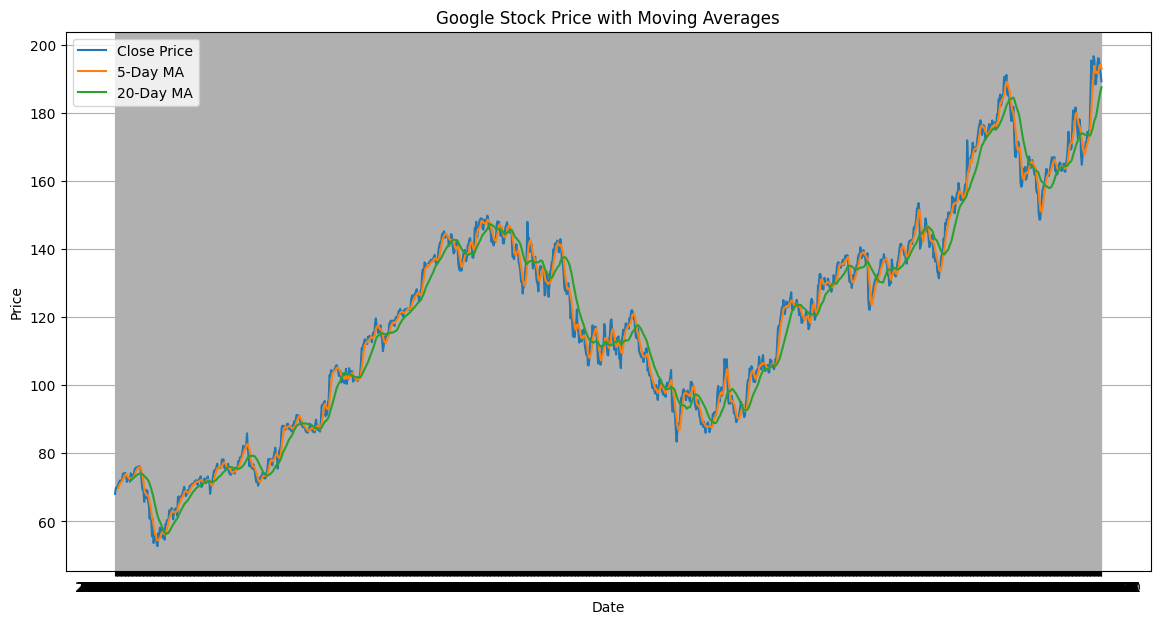

In [18]:
# Plotting for visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA5'], label='5-Day MA')
plt.plot(data['Date'], data['MA20'], label='20-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

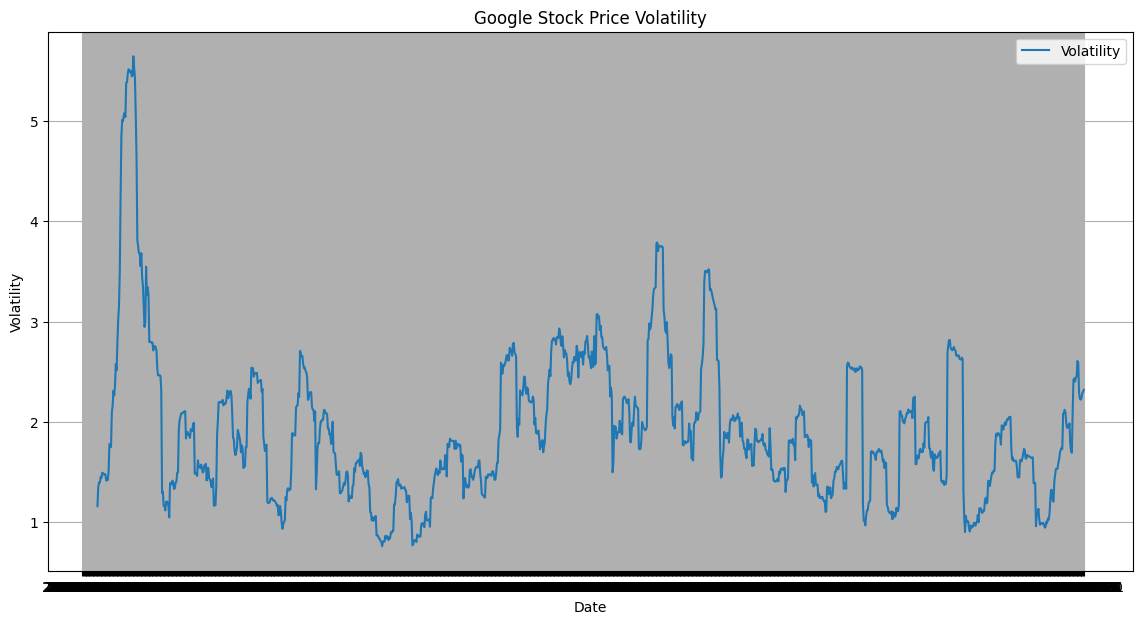

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Google Stock Price Volatility')
plt.legend()
plt.grid(True)
plt.show()

### Calculating and Analyzing Investment Performance and Risk

Why we calculate these:

**Daily Returns:** Tell us how much the stock's price changed each day (as a percentage). These are the building blocks for other calculations.

**Cumulative Returns:** Show the total growth of an investment over time, assuming you reinvest your profits. It answers the question: *"If I invested $1 at the beginning, how much would I have now?"*

**Rolling Standard Deviation (Volatility)**: Measures the fluctuation of daily returns over a specific period (here, 20 days). It indicates the riskiness of the stock – higher volatility means more price swings.


How they're related:

Daily Returns are used to calculate Cumulative Returns. Cumulative returns are essentially the compounded daily returns over time.

Daily Returns are also used to calculate Rolling Volatility. The volatility calculation uses the standard deviation of these daily returns to measure risk.




Daily returns are the foundation. We use them to calculate both the overall growth of the investment (cumulative returns) and how risky it is (volatility). By analyzing all three, we get a better understanding of the stock's past performance and potential future behavior.

In [20]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

In [21]:
# Calculate cumulative returns
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

In [22]:
# Calculate other volatility measures (e.g., rolling standard deviation of returns)
data['Rolling_Volatility_20'] = data['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

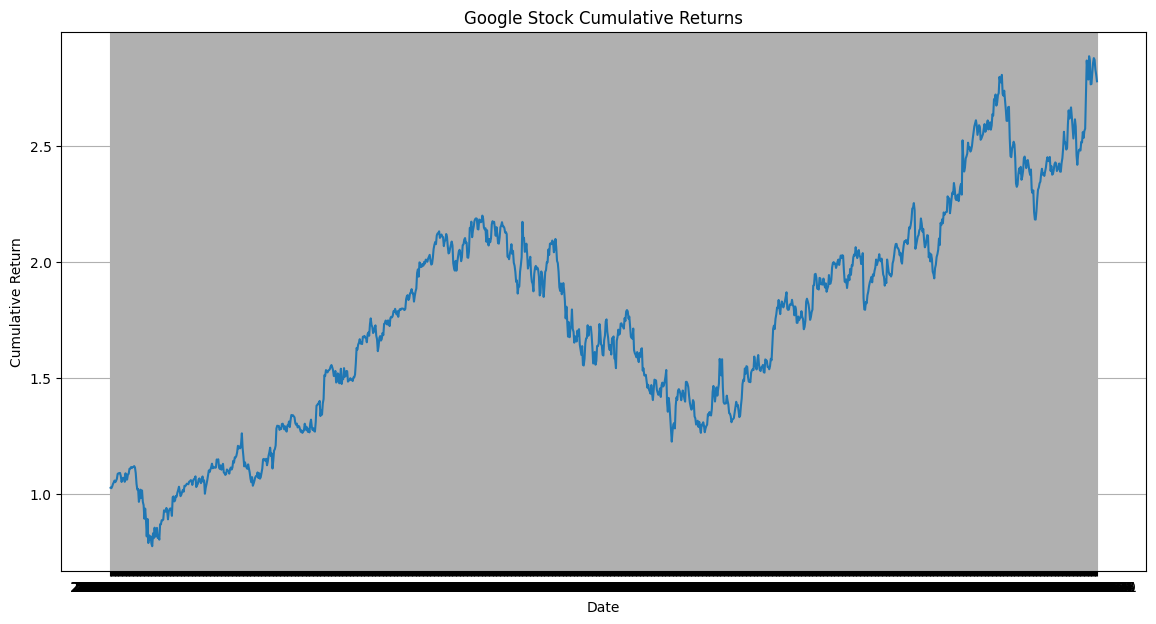

In [24]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Cumulative_Return'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Google Stock Cumulative Returns')
plt.grid(True)
plt.show()

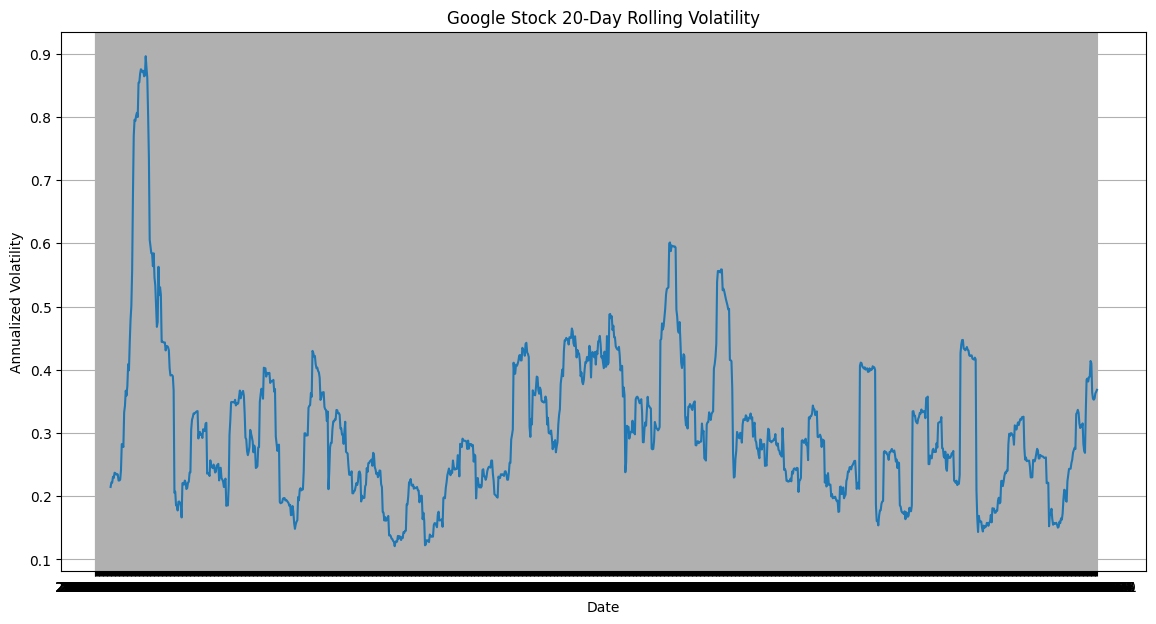

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Rolling_Volatility_20'])
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.title('Google Stock 20-Day Rolling Volatility')
plt.grid(True)
plt.show()

In [26]:
# Displaying summary statistics
print(data[['Daily_Return', 'Rolling_Volatility_20']].describe())

       Daily_Return  Rolling_Volatility_20
count   1256.000000            1237.000000
mean       0.001024               0.305671
std        0.020480               0.118890
min       -0.116341               0.120992
25%       -0.009540               0.226149
50%        0.001843               0.284042
75%        0.011412               0.360776
max        0.102244               0.895755


### Stock Price Prediction: Use machine learning models to forecast future prices

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [42]:
# Assuming 'Close' is the target variable and you want to use more features
features = ['Volume', 'MA5', 'MA20', 'Volatility']
target = 'Close'

# Prepare the data for the model
X = data[features].copy()
y = data[target]

In [43]:
# Handle missing values (if any) - using forward fill
# Instead of using ffill, drop the rows with NaN
X.dropna(inplace=True)
y = y[X.index]  # Ensure y aligns with X after dropping rows

# Split data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize and train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

LinearRegression()

In [45]:
# Make predictions on the test set
predictions_lr = model_lr.predict(X_test_lr)

Mean Squared Error (MSE)

The MSE is a common metric used to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the actual values.

Lower MSE is better: A lower MSE indicates that the model's predictions are closer to the actual values, suggesting a better fit to the data.

Higher MSE is worse: A higher MSE indicates that the model's predictions are further away from the actual values, implying a poorer fit. Interpreting Your Results

In [46]:
# Evaluate the model
mse_lr = mean_squared_error(y_test_lr, predictions_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")

Mean Squared Error (Linear Regression): 5.404347667212806


In [47]:
# Forecast future prices (example: using the last 5 data points as input)
last_5_data_points = X.tail(5)

In [48]:
# Handle any potential missing values in the last 5 data points
last_5_data_points.fillna(method='ffill', inplace=True)

future_predictions_lr = model_lr.predict(last_5_data_points)

<ipython-input-48-b598304044da>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  last_5_data_points.fillna(method='ffill', inplace=True)
<ipython-input-48-b598304044da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_data_points.fillna(method='ffill', inplace=True)


In [49]:
# Create a Pandas DataFrame for structured output
forecast_dates = data['Date'].tail(5).values  # Get the dates for the forecasted values
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Price': future_predictions_lr})
forecast_data['Date'] = pd.to_datetime(forecast_data['Date']) # Convert 'Date' column to datetime objects
forecast_data = forecast_data.set_index('Date') # Set 'Date' column as index
print("\nForecasted future prices (Linear Regression):")
forecast_data


Forecasted future prices (Linear Regression):


,Forecasted_Price
Date,
2024-12-24,193.318043
2024-12-26,194.755479
2024-12-27,195.488804
2024-12-30,195.343876
2024-12-31,193.963079


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# Initialize and train a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
# Make predictions on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 6.130365466739367


In [53]:
future_predictions_rf = model_rf.predict(last_5_data_points)

In [54]:
# Create a Pandas DataFrame for structured output
forecast_dates = data['Date'].tail(5).values
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Price': future_predictions_rf})
forecast_data['Date'] = pd.to_datetime(forecast_data['Date'])
forecast_data = forecast_data.set_index('Date')

print("\nForecasted future prices (Random Forest):")
forecast_data



Forecasted future prices (Random Forest):


,Forecasted_Price
Date,
2024-12-24,195.324202
2024-12-26,194.365604
2024-12-27,192.284798
2024-12-30,191.099803
2024-12-31,190.210803


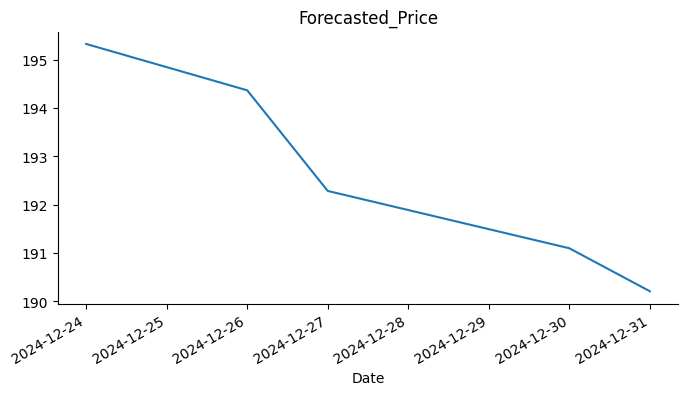

In [55]:
from matplotlib import pyplot as plt
forecast_data['Forecasted_Price'].plot(kind='line', figsize=(8, 4), title='Forecasted_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

### SVR

In [56]:
from sklearn.svm import SVR

In [71]:
# Initialize and train an SVR model
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) # You can tune these hyperparameters
model_svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [72]:
# Make predictions on the test set
predictions_svr = model_svr.predict(X_test)

In [73]:
# Evaluate the model
mse_svr = mean_squared_error(y_test, predictions_svr)
print(f"Mean Squared Error (SVR): {mse_svr}")

Mean Squared Error (SVR): 959.4142591731222


In [74]:
future_predictions_svr = model_svr.predict(last_5_data_points)

In [75]:
# Create a Pandas DataFrame for structured output
forecast_dates = data['Date'].tail(5).values
forecast_data = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Price': future_predictions_svr})
forecast_data['Date'] = pd.to_datetime(forecast_data['Date'])
forecast_data = forecast_data.set_index('Date')

print("\nForecasted future prices (SVR):")
forecast_data


Forecasted future prices (SVR):


,Forecasted_Price
Date,
2024-12-24,196.010005
2024-12-26,195.499846
2024-12-27,192.659973
2024-12-30,191.139987
2024-12-31,189.199987


Interpretation of the MSE values for your models:

Linear Regression (MSE: 5.40): This model has the lowest MSE, indicating that it has the best overall performance among the three in terms of predicting the 'Close' price. Its predictions are relatively close to the actual values.

Random Forest (MSE: 6.13): This model has a slightly higher MSE than Linear Regression, meaning its predictions are slightly less accurate compared to Linear Regression. However, it's still relatively low, suggesting decent performance.

Support Vector Regression (SVR) (MSE: 959.41): This model has a significantly higher MSE compared to the other two. This indicates that its predictions are much further away from the actual values, suggesting a poor fit to the data. It's likely that the SVR model is not capturing the underlying patterns in the data as effectively as the other two models.


In Summary

Based on the MSE values, the Linear Regression model appears to be the most accurate for predicting Google's stock price ('Close') in this scenario. The Random Forest model also performs reasonably well, while the SVR model seems to be less suitable for this particular dataset and target variable.

Important Considerations

MSE is sensitive to outliers: If your data contains outliers, they can heavily influence the MSE. Consider investigating and handling outliers before drawing conclusions.

Domain knowledge: While MSE provides a quantitative measure of performance, it's crucial to consider domain knowledge and other factors when choosing the best model.

Hyperparameter tuning: The performance of models like Random Forest and SVR can be significantly improved by carefully tuning their hyperparameters. You might need to experiment with different parameter settings to find the optimal configuration for your data.